# Convolutional Neural Network Architecture


In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],border_mode='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(input=inp, output=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)       

<ipython-input-2-5241a51932b2>:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
  conv = Conv2D(128, parrallel_kernels[k],border_mode='same',activation='relu',input_shape=input_shape,strides=1)(inp)
<ipython-input-2-5241a51932b2>:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 5, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
  conv = Conv2D(128, parrallel_kernels[k],border_mode='same',activation='relu',input_shape=input_shape,strides=1)(inp)
<ipython-input-2-5241a51932b2>:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 7, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
  conv = Conv2D(128, parrallel_kernels[k],border_mode='same',activation='relu',input_shape=input_shape,strides=1)(inp)
<ipython-input-2-5241a51932b2>:21: UserWarning: Update your `Model` call to the Keras 2 API

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Train on 480 samples, validate on 54 samples
Epoch 1/20
480/480 [==============================] - 63s 132ms/step - loss: 1.9768 - accuracy: 0.1708 - val_loss: 1.8818 - val_accuracy: 0.1481
Epoch 2/20
480/480 [==============================] - 57s 120ms/step - loss: 1.8913 - accuracy: 0.1792 - val_loss: 1.8798 - val_accuracy: 0.1296
Epoch 3/20
480/480 [==============================] - 57s 120ms/step - loss: 1.8916 - accuracy: 0.1646 - val_loss: 1.8537 - val_accuracy: 0.1296
Epoch 4/20
480/480 [==============================] - 58s 121ms/step - loss: 1.8817 - accuracy: 0.2021 - val_loss: 1.8417 - val_accuracy: 0.1296
Epoch 5/20
480/480 [==============================] - 58s 121ms/step - loss: 1.8129 - accuracy: 0.2396 - val_loss: 1.7744 - val_accuracy: 0.2593
Epoch 6/20
480/480 [==============================] - 58s 120ms/step - loss: 1.7242 - accuracy: 0.2604 - val_loss: 1.5857 - val_accuracy: 0.2778
Epoch 7/20
480/480 [==============================] - 57s 119ms/step - loss: 1.6948 -

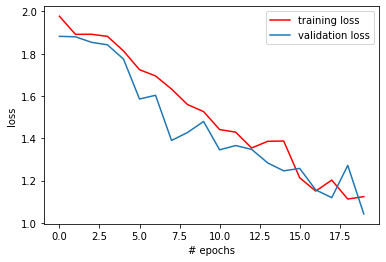

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

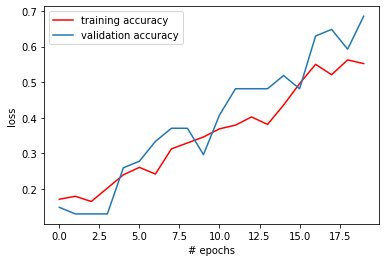

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

60/60 [==============================] - 1s 24ms/step
[1.3877132972081503, 0.4833333194255829]
